# PARTE 1 - REGRESSÃO LINEAR SIMPLES

Carregue o conjunto de dados de gorjetas. Faça o que se pede:
1. Utilizando a biblioteca scikit-learn, treine um modelo de regressão linear que receba como entrada o valor total da conta (total_bill) e faça a predição do valor da gorjeta (tip).
2. Mostre na tela o valor da função custo (erro médio quadrático / MSE) para o modelo treinado
3. Mostre na tela os valores dos pesos (parâmetros).
4. Para um valor de entrada de 30, qual a predição do modelo?
5. Crie uma visualização que mostra no mesmo plot o scatterplot entre a entrada e a saída e a linha de regressão aprendida pelo modelo. E.g.:

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# Questão 1
Utilizando a biblioteca scikit-learn, treine um modelo de regressão linear que receba como entrada o valor total da conta (total_bill) e faça a predição do valor da gorjeta (tip).

In [3]:
x = df[['total_bill']]
y = df['tip']

In [4]:
# criando e treinando o modelo
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [5]:
# Construindo a predição do modelo
y_pred_model = model.predict(x)
print(y_pred_model[:20])

[2.70463616 2.00622312 3.12683472 3.40725019 3.5028225  3.57633966
 1.84133463 3.74332864 2.49983836 2.47253198 1.99887141 4.6234341
 2.53974767 2.85587147 2.47778321 3.1866987  2.00517288 2.631119
 2.70253567 3.0890259 ]


# Questão 2
Mostre na tela o valor da função custo (erro médio quadrático / MSE) para o modelo treinado

In [6]:
#Erro médio quadrático
print('Erro médio quadrático: %.2f' % mean_squared_error(y, y_pred_model))

Erro médio quadrático: 1.04


Complemento

In [7]:
# para visualizar o Coeficiente de Determinação
model.score(x,y)

0.45661658635167657

# Questão 3
Mostre na tela os valores dos pesos (parâmetros).

In [8]:
#Imprimindo Coeficiente de interceptação, ou seja, peso w0.
w0 = model.intercept_
print(f'Coeficiente de interceptação(Peso w0): {w0:.4f}')

#Imprimindo Coeficiente de Inclinação, ou seja, peso w1.
w1 = model.coef_
print(f'Coeficiente de inclinação(Peso w1):    {w1.round(5)}')

Coeficiente de interceptação(Peso w0): 0.9203
Coeficiente de inclinação(Peso w1):    [0.10502]


# Questão 4
Para um valor de entrada de 30, qual a predição do modelo?

In [9]:
#Predição do modelo com o valor de entrada 30
model.predict([[30]])

array([4.07100514])

# Questão 5
Crie uma visualização que mostra no mesmo plot o scatterplot entre a entrada e a saída e a linha de regressão aprendida pelo modelo.

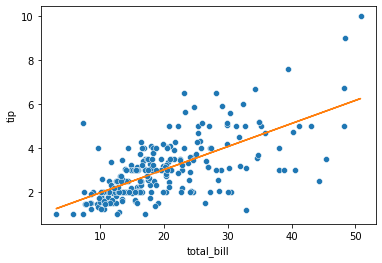

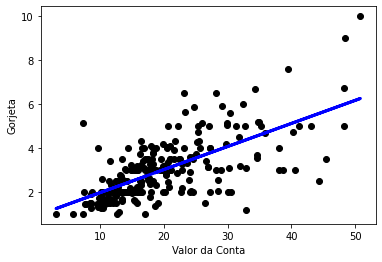

In [10]:
# Plotar com scatterplot
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred_model, color='blue', linewidth=3)
plt.xlabel('Valor da Conta')
plt.ylabel('Gorjeta')
plt.show()

# === Desafio === 
1. Para o mesmo conjunto de dados de gorjetas, treine um modelo de regressão linear implementando o algoritmo de gradiente descendente utilizando Numpy. Pode ser utilizado o gradiente descendente em batch ou o estocástico.
2. Crie um gráfico que mostre o valor da função custo decaindo após cada iteração do treinamento. Plote ao menos 3 exemplos de treinamento com diferentes passos de aprendizagem. E.g.:
3. Mostre as mesmas informações pedidas nas questões anteriores sobre a regressão linear criada com scikit-learn: MSE, pesos, predição para o valor 30 e o plot da reta aprendida. Compare com os resultados do modelo treinado com o scikit-learn.


# Opção 1 -- Está sendo trabalhada 

# Questão 1
Para o mesmo conjunto de dados de gorjetas, treine um modelo de regressão linear implementando o algoritmo de gradiente descendente utilizando Numpy. Pode ser utilizado o gradiente descendente em batch ou o estocástico.

In [11]:
x = df['total_bill']
y = df['tip']
#Função de Custo
def single_point_cost(x,y,w):   
    y_pred= w * x
    cost=( y_pred - y) **2  #linear regression
    return cost

In [12]:
#grad function
def grad(x,y,w,):
    grad_w=2 * x * ((w * x) - y ) # derevative with respect to x
    return grad_w

In [13]:
# let our batch size = 5
#so we will have 2 batches because n=10  and updates will happen 2 times 
w=0
gamma=0.000001
batch_size= 5
all_costs1=[]
for k in range(60):
    for j in range(int(len(x)/batch_size)):
        cost4=0
        for i in range(batch_size):
            z1=single_point_cost(x[i],y[i],w)
            cost4+=z1
        if j==1:
            all_costs1.append(cost4/batch_size) #avearge cost of that batch
        grad_w41=0
        for n in range(batch_size):
            f1=grad(x[i],y[i],w)
            grad_w41+=f1
    
        grad_w42=grad_w41/batch_size  #average grad of that function

        w= w- (gamma * grad_w42)  # update takes place after every batch

In [14]:
# let our batch size = 5
#so we will have 2 batches because n=10  and updates will happen 2 times 
w=0
gamma=0.00001
batch_size= 5
all_costs2=[]
for k in range(60):
    for j in range(int(len(x)/batch_size)):
        cost4=0
        for i in range(batch_size):
            z1=single_point_cost(x[i],y[i],w)
            cost4+=z1
        if j==1:
            all_costs2.append(cost4/batch_size) #avearge cost of that batch
        grad_w41=0
        for n in range(batch_size):
            f1=grad(x[i],y[i],w)
            grad_w41+=f1
    
        grad_w42=grad_w41/batch_size  #average grad of that function

        w= w- (gamma * grad_w42)  # update takes place after every batch

In [15]:
# let our batch size = 5
#so we will have 2 batches because n=10  and updates will happen 2 times 
w=0
gamma=0.0003
batch_size= 15
all_costs3=[]
for k in range(60):
    for j in range(int(len(x)/batch_size)):
        cost4=0
        for i in range(batch_size):
            z1=single_point_cost(x[i],y[i],w)
            cost4+=z1
        if j==1:
            all_costs3.append(cost4/batch_size) #avearge cost of that batch
        grad_w41=0
        for n in range(batch_size):
            f1=grad(x[i],y[i],w)
            grad_w41+=f1
    
        grad_w42=grad_w41/batch_size  #average grad of that function

        w= w- (gamma * grad_w42)  # update takes place after every batch

# Questão 2
Crie um gráfico que mostre o valor da função custo decaindo após cada iteração do treinamento. Plote ao menos 3 exemplos de treinamento com diferentes passos de aprendizagem.

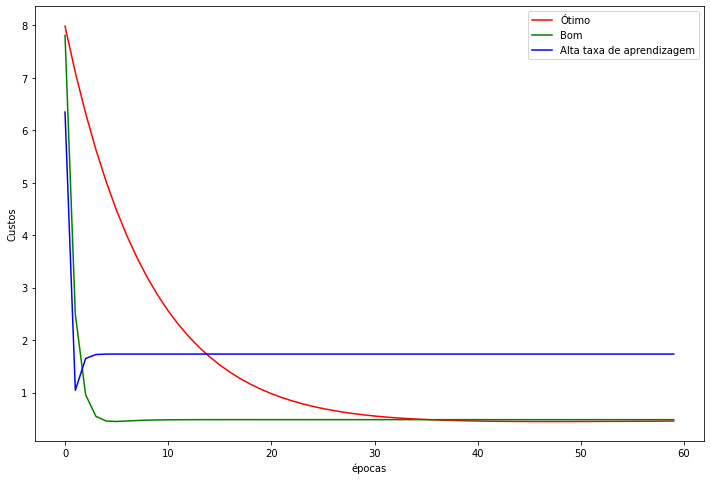

In [16]:
plt.figure(figsize=(12,8))
epochs=np.arange(60)
plt.plot(epochs,all_costs1,c='r',label="Ótimo")
plt.plot(epochs,all_costs2,c='g',label="Bom")
plt.plot(epochs,all_costs3,c='b',label="Alta taxa de aprendizagem")
plt.xlabel("épocas")
plt.ylabel("Custos")
plt.legend()
plt.show()

# Questão 3
Mostre as mesmas informações pedidas nas questões anteriores sobre a regressão linear criada com scikit-learn: MSE, pesos, predição para o valor 30 e o plot da reta aprendida. Compare com os resultados do modelo treinado com o scikit-learn.

# Opção 2

# Gradiente descedente Estocástico

In [18]:
X = df['total_bill']
y = df['tip']
def  cal_cost(theta,X,y):
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [19]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [20]:
lr =0.0001
n_iter = 150

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f}\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          -0.809
Theta1:          0.177
Final cost/MSE:  179.938


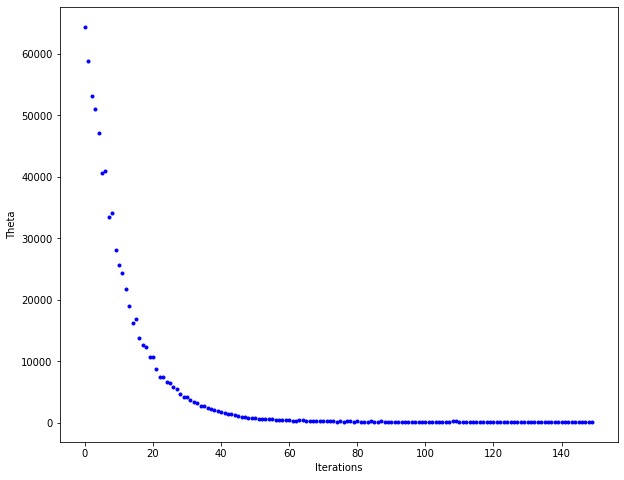

In [21]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Theta')
ax.set_xlabel('Iterations')
theta = np.random.randn(2,1)

ax.plot(range(n_iter),cost_history,'b.');

In [32]:
lr =0.001
n_iter = 100

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f}\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          -1.111
Theta1:          0.193
Final cost/MSE:  221.089


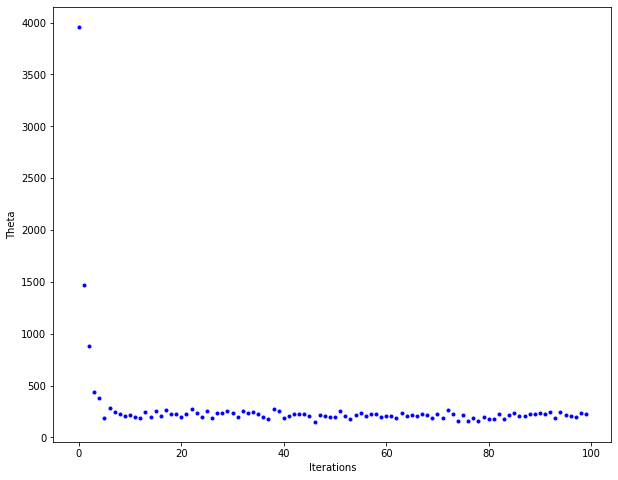

In [33]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Theta')
ax.set_xlabel('Iterations')
theta = np.random.randn(2,1)

ax.plot(range(n_iter),cost_history,'b.');

In [28]:
lr =0.00001
n_iter = 150

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f}\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          0.044
Theta1:          0.822
Final cost/MSE:  25821.839


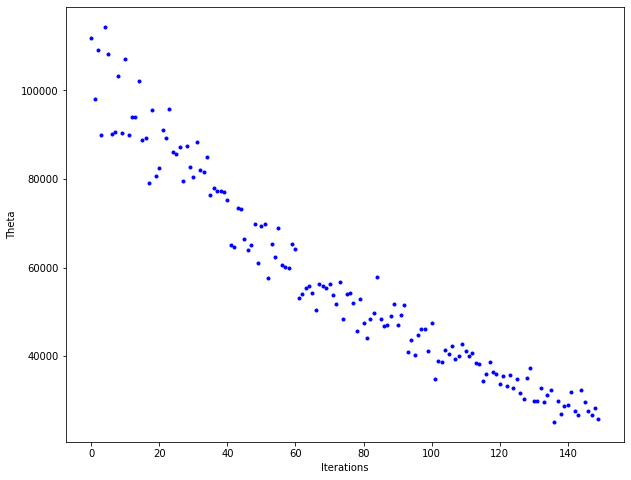

In [29]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Theta')
ax.set_xlabel('Iterations')
theta = np.random.randn(2,1)

ax.plot(range(n_iter),cost_history,'b.');